In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import statsmodels.formula.api as smf

In [2]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [3]:
# Import csv files
daily_composite = pd.read_csv('../Data-Analytics-Final_Project/Resources/daily_composite.csv',index_col=False)

In [4]:
daily_composite.head()

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,date,pA,pB,pD,pC
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,6/2/2001,0.182,NaN,NaN,NaN
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,6/4/2001,0.177,NaN,NaN,NaN
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,6/5/2001,0.195,NaN,NaN,NaN
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,6/6/2001,0.180,NaN,NaN,NaN
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,6/7/2001,0.191,NaN,NaN,NaN


In [5]:
# Get a datetime column
from datetime import datetime
daily_composite['date'] = daily_composite['date'].astype(str)
datetime_list = []
for i in range(len(daily_composite)):
    datetime_list.append(datetime.strptime(daily_composite['date'][i],'%m/%d/%Y'))

In [6]:
daily_composite['datetime'] = datetime_list
daily_composite.head()

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,date,pA,pB,pD,pC,datetime
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,6/2/2001,0.182,NaN,NaN,NaN,2001-06-02
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,6/4/2001,0.177,NaN,NaN,NaN,2001-06-04
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,6/5/2001,0.195,NaN,NaN,NaN,2001-06-05
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,6/6/2001,0.180,NaN,NaN,NaN,2001-06-06
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,6/7/2001,0.191,NaN,NaN,NaN,2001-06-07


C:\Users\Adrianna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


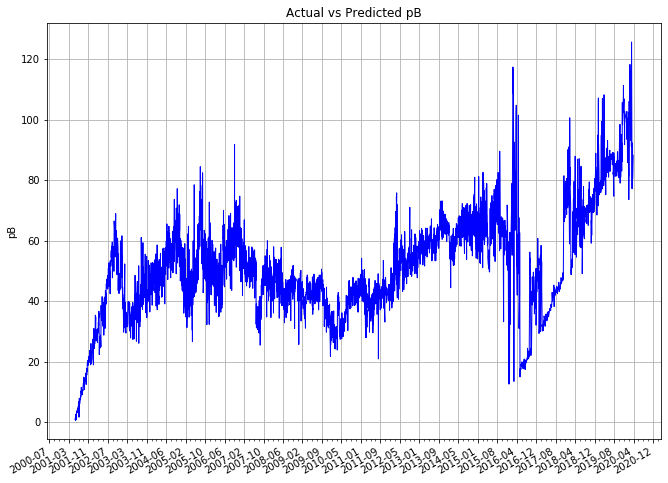

In [7]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_composite['datetime'],daily_composite['average_exhaustion'],c='blue',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pB')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pB')
fig.set_size_inches(11, 8.5)
plt.show()

In [8]:
# Removing first 6 months of data due to unreliable exhaustion values
daily_composite = daily_composite.loc[daily_composite['datestring'] > 20011231].reset_index(drop=True)
daily_composite

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,date,pA,pB,pD,pC,datetime
0,20020102,23057.0,86.0,23.489290,0.217506,1.162791,1/2/2002,0.209,NaN,NaN,NaN,2002-01-02
1,20020103,19952.0,93.0,23.504239,0.219029,1.075269,1/3/2002,0.229,NaN,NaN,NaN,2002-01-03
2,20020104,24246.0,89.0,24.692335,0.218939,1.123596,1/4/2002,0.223,NaN,NaN,NaN,2002-01-04
3,20020107,10924.0,75.0,22.959558,0.217301,1.333333,1/7/2002,0.221,NaN,NaN,NaN,2002-01-07
4,20020108,25361.0,85.0,24.757384,0.217990,1.176471,1/8/2002,0.221,NaN,NaN,NaN,2002-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...
4504,20200320,18527.0,150.0,91.697606,0.189014,0.666667,3/20/2020,0.134,2.459333,0.009750,0.001925,2020-03-20
4505,20200323,22050.0,163.0,92.262835,0.183232,0.613497,3/23/2020,0.143,2.603000,0.012000,0.001800,2020-03-23
4506,20200324,24221.0,177.0,91.541995,0.187317,0.564972,3/24/2020,0.140,2.641500,0.011667,0.001933,2020-03-24
4507,20200325,22649.0,174.0,80.328178,0.193251,0.574713,3/25/2020,0.149,2.673500,0.012333,0.001800,2020-03-25


In [9]:
##########################
# pA Testing Starts Here #
##########################

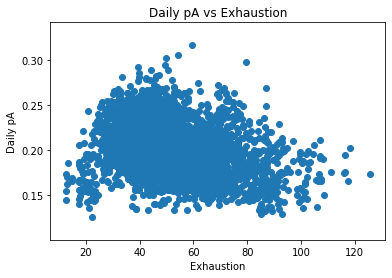

In [10]:
# Look at scatter plots of each independent variable to identify any trends right away
fig, ax = plt.subplots()
ax.scatter(daily_composite['average_exhaustion'],daily_composite['pA'])
plt.title('Daily pA vs Exhaustion')
ax.set_ylabel('Daily pA')
ax.set_xlabel('Exhaustion')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pA_exhaustion.png', dpi=96)
plt.show()

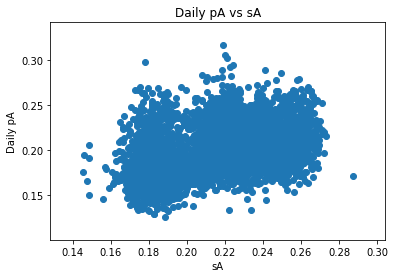

In [11]:
fig, ax = plt.subplots()
ax.scatter(daily_composite['average_sA'],daily_composite['pA'])
plt.title('Daily pA vs sA')
ax.set_ylabel('Daily pA')
ax.set_xlabel('sA')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pA_sA.png', dpi=96)
plt.show()

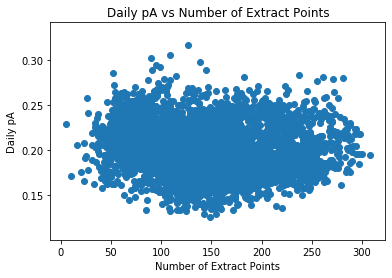

In [12]:
fig, ax = plt.subplots()
ax.scatter(daily_composite['number_extract_points'],daily_composite['pA'])
plt.title('Daily pA vs Number of Extract Points')
ax.set_ylabel('Daily pA')
ax.set_xlabel('Number of Extract Points')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pA_extract_pts.png', dpi=96)
plt.show()

In [13]:
daily_sel = daily_composite[['average_exhaustion','average_sA','number_extract_points','pA']]
model = forward_selected(daily_sel,'pA')

In [14]:
print (model.model.formula)

pA ~ average_sA + average_exhaustion + number_extract_points + 1


In [15]:
print(model.rsquared_adj)

0.17303793959009095


In [16]:
X = daily_composite[['average_exhaustion','average_sA','number_extract_points']]
y = daily_composite['pA'].values.reshape(-1,1)
print(X.shape,y.shape)

(4509, 3) (4509, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.17305350479129866
Testing Score: 0.17237981844537897


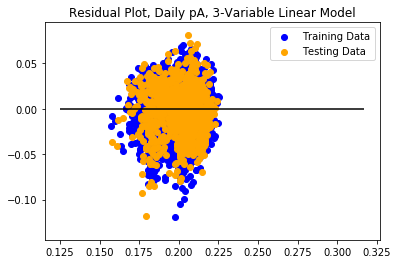

In [20]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
ax.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot, Daily pA, 3-Variable Linear Model')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pA_linear_residual.png', dpi=96)
plt.show()

In [21]:
daily_pA = daily_composite.copy()
daily_pA = daily_pA[['datetime','average_exhaustion','average_sA','number_extract_points','pA']].dropna()
daily_pA.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pA
0,2002-01-02,23.489290,0.217506,86.0,0.209
1,2002-01-03,23.504239,0.219029,93.0,0.229
2,2002-01-04,24.692335,0.218939,89.0,0.223
3,2002-01-07,22.959558,0.217301,75.0,0.221
4,2002-01-08,24.757384,0.217990,85.0,0.221


In [22]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [23]:
variables_used = 'Exhaustion, sA, Number Extract Points'
num_variables = 3
X = daily_pA[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pA['pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
SS_Residual = sum((y-predicted)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 Value: {r_squared}')
print(f'Adjusted R2 value: {adjusted_r_squared}')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(4509, 3) (4509, 1)
Exhaustion, sA, Number Extract Points
Training Score: 0.17305350479129866
Testing Score: 0.17237981844537897
R2 Value: [0.17292991]
Adjusted R2 value: [0.17237915]
MSE: 0.0006031974980129228


In [24]:
variables_used = 'Exhaustion'
num_variables = 1
X = daily_pA[['average_exhaustion']]
y = daily_pA['pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(4509, 1) (4509, 1)
Exhaustion
Training Score: 0.1226422911194829
Testing Score: 0.0933416710963858


In [25]:
variables_used = 'sA'
num_variables = 1
X = daily_pA[['average_sA']]
y = daily_pA['pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(4509, 1) (4509, 1)
sA
Training Score: 0.131878407331952
Testing Score: 0.162209235035628


In [26]:
variables_used = 'Number Extract Points'
num_variables = 1
X = daily_pA[['number_extract_points']]
y = daily_pA['pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(4509, 1) (4509, 1)
Number Extract Points
Training Score: 0.015031414195012418
Testing Score: 0.011564321608657835


In [27]:
variables_used = 'Exhaustion, sA'
num_variables = 2
X = daily_pA[['average_exhaustion','average_sA']]
y = daily_pA['pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(4509, 2) (4509, 1)
Exhaustion, sA
Training Score: 0.17105271899909313
Testing Score: 0.17435171840350872


In [28]:
variables_used = 'Exhaustion, Number Extract Points'
num_variables = 2
X = daily_pA[['average_exhaustion','number_extract_points']]
y = daily_pA['pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(4509, 2) (4509, 1)
Exhaustion, Number Extract Points
Training Score: 0.1382617511922566
Testing Score: 0.1053052021763613


In [29]:
variables_used = 'sA, Number Extract Points'
num_variables = 2
X = daily_pA[['average_sA','number_extract_points']]
y = daily_pA['pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(4509, 2) (4509, 1)
sA, Number Extract Points
Training Score: 0.13189164792572627
Testing Score: 0.16202564980520517


In [30]:
pA_reg_results = {'Variables':variables_list,
              'Number of Variables':num_vars_list,
              'Score':score_list,
              'MSE':mse_list}
pA_reg_results_df = pd.DataFrame(pA_reg_results).sort_values('Score',ascending=False)
pA_reg_results_df

,Variables,Number of Variables,Score,MSE
0,"Exhaustion, sA, Number Extract Points",3,0.172930,0.000603
4,"Exhaustion, sA",2,0.171969,0.000604
2,sA,1,0.139875,0.000627
6,"sA, Number Extract Points",2,0.139836,0.000627
5,"Exhaustion, Number Extract Points",2,0.129689,0.000635
1,Exhaustion,1,0.115027,0.000645
3,Number Extract Points,1,0.014187,0.000719


In [31]:
daily_pA.to_csv('Resources/daily_pA.csv',index=False)

In [32]:
##########################
# pB Testing Starts Here #
##########################

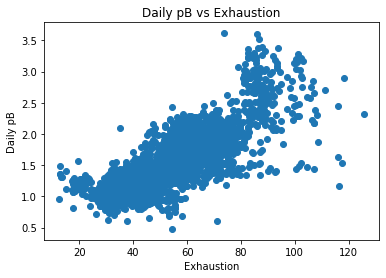

In [33]:
# Look at scatter plots of each independent variable to identify any trends right away
fig, ax = plt.subplots()
ax.scatter(daily_composite['average_exhaustion'],daily_composite['pB'])
plt.title('Daily pB vs Exhaustion')
ax.set_ylabel('Daily pB')
ax.set_xlabel('Exhaustion')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pB_exhaustion.png', dpi=96)
plt.show()

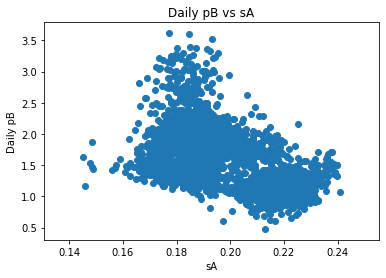

In [34]:
fig, ax = plt.subplots()
ax.scatter(daily_composite['average_sA'],daily_composite['pB'])
plt.title('Daily pB vs sA')
ax.set_ylabel('Daily pB')
ax.set_xlabel('sA')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pB_sA.png', dpi=96)
plt.show()

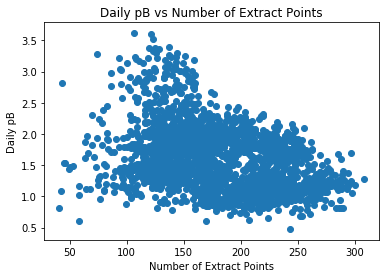

In [35]:
fig, ax = plt.subplots()
ax.scatter(daily_composite['number_extract_points'],daily_composite['pB'])
plt.title('Daily pB vs Number of Extract Points')
ax.set_ylabel('Daily pB')
ax.set_xlabel('Number of Extract Points')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pB_extract_pts.png', dpi=96)
plt.show()

In [36]:
daily_pB = daily_composite.copy()
daily_pB = daily_pB[['average_exhaustion','average_sA','number_extract_points','pB']].dropna().reset_index(drop=True)
daily_sel = daily_pB[['average_exhaustion','average_sA','number_extract_points','pB']]
model = forward_selected(daily_sel,'pB')

In [37]:
print (model.model.formula)

pB ~ average_exhaustion + number_extract_points + average_sA + 1


In [38]:
print(model.rsquared_adj)

0.6161216740861257


In [39]:
X = daily_sel[['average_exhaustion','average_sA','number_extract_points']].dropna()
y = daily_sel['pB'].values.reshape(-1,1)
print(X.shape,y.shape)

(2334, 3) (2334, 1)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.6276262270381734
Testing Score: 0.5786598405969774


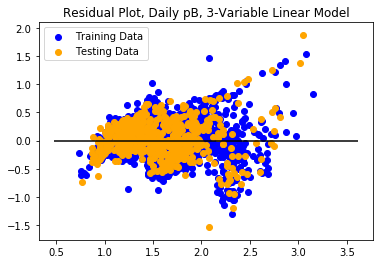

In [43]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
ax.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot, Daily pB, 3-Variable Linear Model')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pB_linear_residual.png', dpi=96)
plt.show()

In [44]:
daily_pB = daily_composite.copy()
daily_pB = daily_pB[['datetime','average_exhaustion','average_sA','number_extract_points','pB']].dropna()
daily_pB.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pB
2141,2009-08-12,47.836660,0.236600,148.0,1.556
2142,2009-08-13,45.127344,0.239869,141.0,1.324
2143,2009-08-14,46.250910,0.237382,154.0,1.545
2144,2009-08-15,47.276493,0.238790,152.0,1.512
2145,2009-08-16,45.022368,0.240766,162.0,1.077


In [45]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [46]:
variables_used = 'Exhaustion, sA, Number Extract Points'
num_variables = 3
X = daily_pB[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
SS_Residual = sum((y-predicted)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 Value: {r_squared}')
print(f'Adjusted R2 value: {adjusted_r_squared}')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 3) (2334, 1)
Exhaustion, sA, Number Extract Points
Training Score: 0.61788701964819
Testing Score: 0.6092219792261278
R2 Value: [0.61624273]
Adjusted R2 value: [0.61574862]
MSE: 0.0988823535915265


In [47]:
variables_used = 'Exhaustion'
num_variables = 1
X = daily_pB[['average_exhaustion']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 1) (2334, 1)
Exhaustion
Training Score: 0.6025359400924178
Testing Score: 0.5984842939660653


In [48]:
variables_used = 'sA'
num_variables = 1
X = daily_pB[['average_sA']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 1) (2334, 1)
sA
Training Score: 0.2676471682623147
Testing Score: 0.2869499958492173


In [49]:
variables_used = 'Number Extract Points'
num_variables = 1
X = daily_pB[['number_extract_points']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 1) (2334, 1)
Number Extract Points
Training Score: 0.13664918488197697
Testing Score: 0.09756166964970714


In [50]:
variables_used = 'Exhaustion, sA'
num_variables = 2
X = daily_pB[['average_exhaustion','average_sA']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 2) (2334, 1)
Exhaustion, sA
Training Score: 0.6076181880726349
Testing Score: 0.6072186565993132


In [51]:
variables_used = 'Exhaustion, Number Extract Points'
num_variables = 2
X = daily_pB[['average_exhaustion','number_extract_points']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 2) (2334, 1)
Exhaustion, Number Extract Points
Training Score: 0.6177803057298114
Testing Score: 0.6082619981618


In [52]:
variables_used = 'sA, Number Extract Points'
num_variables = 2
X = daily_pB[['average_sA','number_extract_points']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 2) (2334, 1)
sA, Number Extract Points
Training Score: 0.2751571043651775
Testing Score: 0.2826119893950636


In [53]:
pB_reg_results = {'Variables':variables_list,
              'Number of Variables':num_vars_list,
              'Score':score_list,
              'MSE':mse_list}
pB_reg_results_df = pd.DataFrame(pB_reg_results).sort_values('Score',ascending=False)
pB_reg_results_df

,Variables,Number of Variables,Score,MSE
0,"Exhaustion, sA, Number Extract Points",3,0.616243,0.098882
5,"Exhaustion, Number Extract Points",2,0.615940,0.098960
4,"Exhaustion, sA",2,0.607883,0.101036
1,Exhaustion,1,0.601966,0.102561
6,"sA, Number Extract Points",2,0.277530,0.186158
2,sA,1,0.272751,0.187390
3,Number Extract Points,1,0.128449,0.224572


In [54]:
daily_pB.to_csv('Resources/daily_pB.csv',index=False)

In [55]:
##########################
# pC Testing Starts Here #
##########################

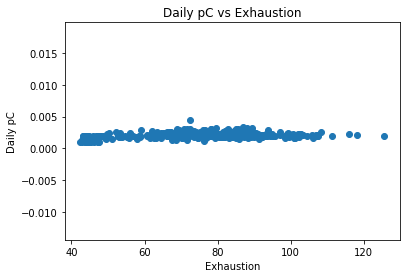

In [56]:
# Look at scatter plots of each independent variable to identify any trends right away
fig, ax = plt.subplots()
ax.scatter(daily_composite['average_exhaustion'],daily_composite['pC'])
plt.title('Daily pC vs Exhaustion')
ax.set_ylabel('Daily pC')
ax.set_xlabel('Exhaustion')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pC_exhaustion.png', dpi=96)
plt.show()

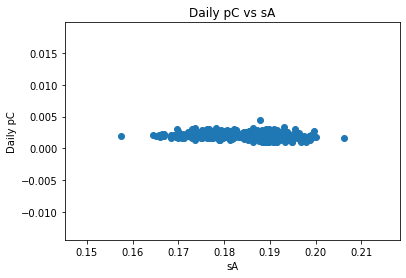

In [57]:
fig, ax = plt.subplots()
ax.scatter(daily_composite['average_sA'],daily_composite['pC'])
plt.title('Daily pC vs sA')
ax.set_ylabel('Daily pC')
ax.set_xlabel('sA')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pC_sA.png', dpi=96)
plt.show()

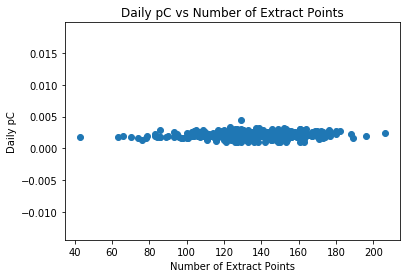

In [58]:
fig, ax = plt.subplots()
ax.scatter(daily_composite['number_extract_points'],daily_composite['pC'])
plt.title('Daily pC vs Number of Extract Points')
ax.set_ylabel('Daily pC')
ax.set_xlabel('Number of Extract Points')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pC_extract_pts.png', dpi=96)
plt.show()

In [59]:
daily_pC = daily_composite.copy()
daily_pC = daily_pC[['average_exhaustion','average_sA','number_extract_points','pC']].dropna().reset_index(drop=True)
daily_sel = daily_pC.copy()
model = forward_selected(daily_sel,'pC')

In [60]:
print (model.model.formula)

pC ~ average_exhaustion + number_extract_points + 1


In [61]:
print(model.rsquared_adj)

0.11984875767705494


In [62]:
X = daily_pC[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pC['pC'].values.reshape(-1,1)
print(X.shape,y.shape)

(455, 3) (455, 1)


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [65]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.1150817971451471
Testing Score: 0.10330224700839619


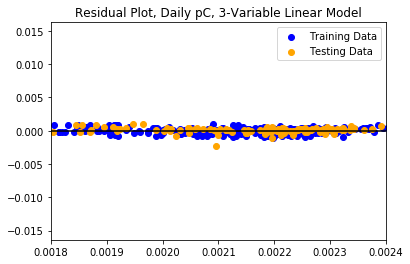

In [66]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
ax.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot, Daily pC, 3-Variable Linear Model')
ax.set_xlim(0.0018,0.0024)
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pC_linear_residual.png', dpi=96)
plt.show()

In [67]:
daily_pC = daily_composite.copy()
daily_pC = daily_pC[['datetime','average_exhaustion','average_sA','number_extract_points','pC']].dropna()
daily_pC.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pC
4039,2017-08-23,43.194169,0.185240,111.0,0.001333
4040,2017-08-24,43.655595,0.188209,145.0,0.002000
4042,2017-08-28,42.783531,0.189823,150.0,0.001333
4043,2017-08-29,43.937784,0.189681,136.0,0.001000
4045,2017-09-05,44.898303,0.193390,149.0,0.001000


In [68]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [69]:
variables_used = 'Exhaustion, sA, Number Extract Points'
num_variables = 3
X = daily_pC[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pC['pC'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
SS_Residual = sum((y-predicted)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 Value: {r_squared}')
print(f'Adjusted R2 value: {adjusted_r_squared}')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(455, 3) (455, 1)
Exhaustion, sA, Number Extract Points
Training Score: 0.1150817971451471
Testing Score: 0.10330224700839619
R2 Value: [0.12106584]
Adjusted R2 value: [0.11521927]
MSE: 1.631240415661091e-07


In [70]:
variables_used = 'Exhaustion'
num_variables = 1
X = daily_pC[['average_exhaustion']]
y = daily_pC['pC'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(455, 1) (455, 1)
Exhaustion
Training Score: 0.08933587485111627
Testing Score: 0.06386140025606668


In [71]:
variables_used = 'sA'
num_variables = 1
X = daily_pC[['average_sA']]
y = daily_pC['pC'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(455, 1) (455, 1)
sA
Training Score: 0.008699944095829859
Testing Score: -0.025360120111329154


In [72]:
variables_used = 'Number Extract Points'
num_variables = 1
X = daily_pC[['number_extract_points']]
y = daily_pC['pC'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(455, 1) (455, 1)
Number Extract Points
Training Score: 0.015028124290435096
Testing Score: -0.034640768128811894


In [73]:
variables_used = 'Exhaustion, sA'
num_variables = 2
X = daily_pC[['average_exhaustion','average_sA']]
y = daily_pC['pC'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(455, 2) (455, 1)
Exhaustion, sA
Training Score: 0.08933869477611811
Testing Score: 0.0637637673741781


In [74]:
variables_used = 'Exhaustion, Number Extract Points'
num_variables = 2
X = daily_pC[['average_exhaustion','number_extract_points']]
y = daily_pC['pC'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(455, 2) (455, 1)
Exhaustion, Number Extract Points
Training Score: 0.11486840959220768
Testing Score: 0.10175445665746653


In [75]:
variables_used = 'sA, Number Extract Points'
num_variables = 2
X = daily_pC[['average_sA','number_extract_points']]
y = daily_pC['pC'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(455, 2) (455, 1)
sA, Number Extract Points
Training Score: 0.02727540525122596
Testing Score: 0.0004042143114914021


In [76]:
pC_reg_results = {'Variables':variables_list,
              'Number of Variables':num_vars_list,
              'Score':score_list,
              'MSE':mse_list}
pC_reg_results_df = pd.DataFrame(pC_reg_results).sort_values('Score',ascending=False)
pC_reg_results_df

,Variables,Number of Variables,Score,MSE
0,"Exhaustion, sA, Number Extract Points",3,0.121066,1.631240e-07
5,"Exhaustion, Number Extract Points",2,0.120484,1.632321e-07
1,Exhaustion,1,0.091781,1.685592e-07
4,"Exhaustion, sA",2,0.091755,1.685638e-07
6,"sA, Number Extract Points",2,0.029981,1.800287e-07
3,Number Extract Points,1,0.011522,1.834547e-07
2,sA,1,0.009601,1.838112e-07


In [77]:
daily_pC.to_csv('Resources/daily_pC.csv',index=False)

In [78]:
##########################
# pD Testing Starts Here #
##########################

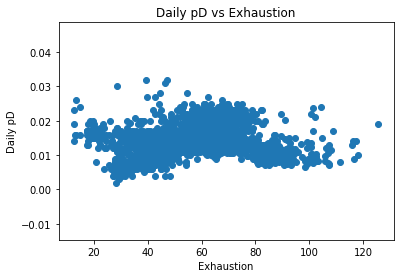

In [79]:
# Look at scatter plots of each independent variable to identify any trends right away
fig, ax = plt.subplots()
ax.scatter(daily_composite['average_exhaustion'],daily_composite['pD'])
plt.title('Daily pD vs Exhaustion')
ax.set_ylabel('Daily pD')
ax.set_xlabel('Exhaustion')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pD_exhaustion.png', dpi=96)
plt.show()

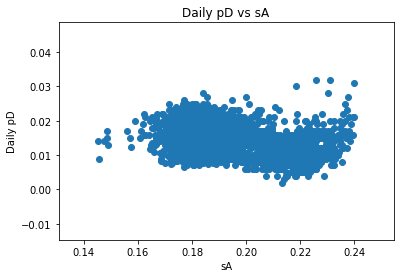

In [80]:
fig, ax = plt.subplots()
ax.scatter(daily_composite['average_sA'],daily_composite['pD'])
plt.title('Daily pD vs sA')
ax.set_ylabel('Daily pD')
ax.set_xlabel('sA')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pD_sA.png', dpi=96)
plt.show()

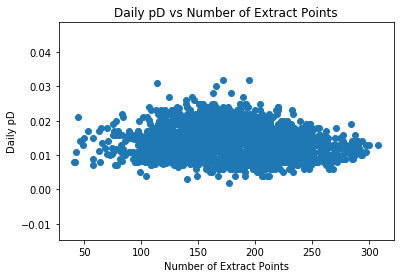

In [81]:
fig, ax = plt.subplots()
ax.scatter(daily_composite['number_extract_points'],daily_composite['pD'])
plt.title('Daily pD vs Number of Extract Points')
ax.set_ylabel('Daily pD')
ax.set_xlabel('Number of Extract Points')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pD_extract_pts.png', dpi=96)
plt.show()

In [82]:
daily_pD = daily_composite.copy()
daily_pD = daily_pD[['average_exhaustion','average_sA','number_extract_points','pD']].dropna().reset_index(drop=True)
daily_sel = daily_pD.copy()
model = forward_selected(daily_sel,'pD')

In [83]:
print (model.model.formula)

pD ~ average_sA + number_extract_points + 1


In [84]:
print(model.rsquared_adj)

0.12799183813213078


In [85]:
X = daily_pD[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pD['pD'].values.reshape(-1,1)
print(X.shape,y.shape)

(2335, 3) (2335, 1)


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [88]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.13888249240731831
Testing Score: 0.09638428472175664


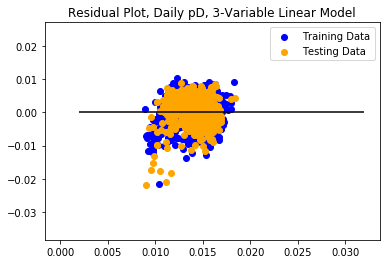

In [89]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
ax.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot, Daily pD, 3-Variable Linear Model')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pD_linear_residual.png', dpi=96)
plt.show()

In [90]:
daily_pD = daily_composite.copy()
daily_pD = daily_pD[['datetime','average_exhaustion','average_sA','number_extract_points','pD']].dropna()
daily_pD.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pD
2141,2009-08-12,47.836660,0.236600,148.0,0.017
2142,2009-08-13,45.127344,0.239869,141.0,0.021
2143,2009-08-14,46.250910,0.237382,154.0,0.016
2144,2009-08-15,47.276493,0.238790,152.0,0.019
2146,2009-08-17,44.291179,0.236525,152.0,0.025


In [91]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [92]:
variables_used = 'Exhaustion, sA, Number Extract Points'
num_variables = 3
X = daily_pD[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pD['pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
SS_Residual = sum((y-predicted)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 Value: {r_squared}')
print(f'Adjusted R2 value: {adjusted_r_squared}')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2335, 3) (2335, 1)
Exhaustion, sA, Number Extract Points
Training Score: 0.13888249240731831
Testing Score: 0.09638428472175664
R2 Value: [0.12807163]
Adjusted R2 value: [0.12694946]
MSE: 1.694050236317716e-05


In [93]:
variables_used = 'Exhaustion'
num_variables = 1
X = daily_pD[['average_exhaustion']]
y = daily_pD['pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2335, 1) (2335, 1)
Exhaustion
Training Score: 0.04772091939933565
Testing Score: 0.018285594185902143


In [94]:
variables_used = 'sA'
num_variables = 1
X = daily_pD[['average_sA']]
y = daily_pD['pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2335, 1) (2335, 1)
sA
Training Score: 0.13341494501401663
Testing Score: 0.10372368198349234


In [95]:
variables_used = 'Number Extract Points'
num_variables = 1
X = daily_pD[['number_extract_points']]
y = daily_pD['pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2335, 1) (2335, 1)
Number Extract Points
Training Score: 0.023617746127046813
Testing Score: 0.032859535807838736


In [96]:
variables_used = 'Exhaustion, sA'
num_variables = 2
X = daily_pD[['average_exhaustion','average_sA']]
y = daily_pD['pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2335, 2) (2335, 1)
Exhaustion, sA
Training Score: 0.1334404185192597
Testing Score: 0.10315180090387599


In [97]:
variables_used = 'Exhaustion, Number Extract Points'
num_variables = 2
X = daily_pD[['average_exhaustion','number_extract_points']]
y = daily_pD['pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2335, 2) (2335, 1)
Exhaustion, Number Extract Points
Training Score: 0.05580715215354737
Testing Score: 0.03615759224584736


In [98]:
variables_used = 'sA, Number Extract Points'
num_variables = 2
X = daily_pD[['average_sA','number_extract_points']]
y = daily_pD['pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2335, 2) (2335, 1)
sA, Number Extract Points
Training Score: 0.13887998948049352
Testing Score: 0.09654757518748935


In [99]:
pD_reg_results = {'Variables':variables_list,
              'Number of Variables':num_vars_list,
              'Score':score_list,
              'MSE':mse_list}
pD_reg_results_df = pd.DataFrame(pD_reg_results).sort_values('Score',ascending=False)
pD_reg_results_df

,Variables,Number of Variables,Score,MSE
6,"sA, Number Extract Points",2,0.128112,0.000017
0,"Exhaustion, sA, Number Extract Points",3,0.128072,0.000017
2,sA,1,0.125953,0.000017
4,"Exhaustion, sA",2,0.125822,0.000017
5,"Exhaustion, Number Extract Points",2,0.050996,0.000018
1,Exhaustion,1,0.040355,0.000019
3,Number Extract Points,1,0.026368,0.000019


In [100]:
daily_pD.to_csv('Resources/daily_pD.csv',index=False)